In [287]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [288]:
#read in CO data
CO_2015 = pd.read_csv('CO.csv')
CO_2016 = pd.read_csv('CO2016.csv')
CO_2017 = pd.read_csv('CO2017.csv')
CO_2018 = pd.read_csv('CO2018.csv')
CO_2019 = pd.read_csv('CO2019.csv')
CO_2020 = pd.read_csv('CO2020.csv')

In [289]:
#append CO data frames 
CO_df = CO_2015.append([CO_2016, CO_2017, CO_2018, CO_2019, CO_2020])

In [290]:
#preview CO data
CO_df.head()

,Date,Source,Site ID,POC,Daily Max 8-hour CO Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2015,AQS,110010023,1,0.8,ppm,9,Verizon,19,79.0,42101,Carbon monoxide,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.903889,-77.046389
1,01/02/2015,AQS,110010023,1,1.1,ppm,13,Verizon,24,100.0,42101,Carbon monoxide,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.903889,-77.046389
2,01/03/2015,AQS,110010023,1,1.5,ppm,17,Verizon,24,100.0,42101,Carbon monoxide,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.903889,-77.046389
3,01/04/2015,AQS,110010023,1,0.9,ppm,10,Verizon,24,100.0,42101,Carbon monoxide,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.903889,-77.046389
4,01/05/2015,AQS,110010023,1,0.6,ppm,7,Verizon,18,75.0,42101,Carbon monoxide,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.903889,-77.046389


In [291]:
#we want monthly data, but we have daily
#we will use a pivot table to average the daily values to monthly

#first get a column that has date in the format yyyy-mm-01
CO_df['Year'] = pd.DatetimeIndex(CO_df['Date']).year
CO_df['Month'] = pd.DatetimeIndex(CO_df['Date']).month
CO_df['DATE'] = pd.to_datetime(CO_df[['Year', 'Month']].assign(DAY=1))
CO_df.head()

,Date,Source,Site ID,POC,Daily Max 8-hour CO Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Year,Month,DATE
0,01/01/2015,AQS,110010023,1,0.8,ppm,9,Verizon,19,79.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.903889,-77.046389,2015,1,2015-01-01
1,01/02/2015,AQS,110010023,1,1.1,ppm,13,Verizon,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.903889,-77.046389,2015,1,2015-01-01
2,01/03/2015,AQS,110010023,1,1.5,ppm,17,Verizon,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.903889,-77.046389,2015,1,2015-01-01
3,01/04/2015,AQS,110010023,1,0.9,ppm,10,Verizon,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.903889,-77.046389,2015,1,2015-01-01
4,01/05/2015,AQS,110010023,1,0.6,ppm,7,Verizon,18,75.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.903889,-77.046389,2015,1,2015-01-01


In [292]:
#make pivot table
CO_monthly_df = pd.pivot_table(CO_df, #data
                               values = 'Daily Max 8-hour CO Concentration', #the values we want to average
                               index = 'DATE', #rows
                               aggfunc = np.mean) #how we want data aggregated 

#rename column to include units
CO_monthly_df = CO_monthly_df.rename(columns={'Daily Max 8-hour CO Concentration':'Daily Max 8-hour CO Concentration ppm'})

In [293]:
CO_monthly_df.head()

,Daily Max 8-hour CO Concentration ppm
DATE,
2015-01-01,0.740323
2015-02-01,0.630769
2015-03-01,0.651613
2015-04-01,0.423333
2015-05-01,0.333871


In [294]:
#follow the same steps for the remaining pollution data
#NO2, ozone, PM10, PM2.5, and SO2

#read in NO2 data
NO2_2015 = pd.read_csv('NO2.csv')
NO2_2016 = pd.read_csv('NO22016.csv')
NO2_2017 = pd.read_csv('NO22017.csv')
NO2_2018 = pd.read_csv('NO22018.csv')
NO2_2019 = pd.read_csv('NO22019.csv')
NO2_2020 = pd.read_csv('NO22020.csv')

In [295]:
#append NO2 data frames 
NO2_df = NO2_2015.append([NO2_2016, NO2_2017, NO2_2018, NO2_2019, NO2_2020])

In [296]:
#preview NO2 data
NO2_df.head()

,Date,Source,Site ID,POC,Daily Max 1-hour NO2 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2015,AQS,110010043,1,38.7,ppb,36,MCMILLAN NCore-PAMS,24,100.0,42602,Nitrogen dioxide (NO2),47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
1,01/02/2015,AQS,110010043,1,42.3,ppb,40,MCMILLAN NCore-PAMS,24,100.0,42602,Nitrogen dioxide (NO2),47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
2,01/03/2015,AQS,110010043,1,44.2,ppb,42,MCMILLAN NCore-PAMS,24,100.0,42602,Nitrogen dioxide (NO2),47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
3,01/04/2015,AQS,110010043,1,25.0,ppb,24,MCMILLAN NCore-PAMS,24,100.0,42602,Nitrogen dioxide (NO2),47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
4,01/05/2015,AQS,110010043,1,9.5,ppb,8,MCMILLAN NCore-PAMS,24,100.0,42602,Nitrogen dioxide (NO2),47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178


In [297]:
NO2_df['Year'] = pd.DatetimeIndex(NO2_df['Date']).year
NO2_df['Month'] = pd.DatetimeIndex(NO2_df['Date']).month
NO2_df['DATE'] = pd.to_datetime(NO2_df[['Year', 'Month']].assign(DAY=1))
NO2_df.head()

,Date,Source,Site ID,POC,Daily Max 1-hour NO2 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Year,Month,DATE
0,01/01/2015,AQS,110010043,1,38.7,ppb,36,MCMILLAN NCore-PAMS,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
1,01/02/2015,AQS,110010043,1,42.3,ppb,40,MCMILLAN NCore-PAMS,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
2,01/03/2015,AQS,110010043,1,44.2,ppb,42,MCMILLAN NCore-PAMS,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
3,01/04/2015,AQS,110010043,1,25.0,ppb,24,MCMILLAN NCore-PAMS,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
4,01/05/2015,AQS,110010043,1,9.5,ppb,8,MCMILLAN NCore-PAMS,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01


In [298]:
NO2_monthly_df = pd.pivot_table(NO2_df, #data
                                values = 'Daily Max 1-hour NO2 Concentration', #the values we want to average
                                index = 'DATE', #rows
                                aggfunc = np.mean) #how we want data aggregated 

#rename column to include units
NO2_monthly_df = NO2_monthly_df.rename(columns={'Daily Max 1-hour NO2 Concentration':'Daily Max 1-hour NO2 Concentration ppb'})

In [299]:
NO2_monthly_df.head()

,Daily Max 1-hour NO2 Concentration ppb
DATE,
2015-01-01,32.500000
2015-02-01,36.846429
2015-03-01,33.450000
2015-04-01,25.636667
2015-05-01,15.172581


In [300]:
#read in ozone data
ozone_2015 = pd.read_csv('ozone.csv')
ozone_2016 = pd.read_csv('ozone2016.csv')
ozone_2017 = pd.read_csv('ozone2017.csv')
ozone_2018 = pd.read_csv('ozone2018.csv')
ozone_2019 = pd.read_csv('ozone2019.csv')
ozone_2020 = pd.read_csv('ozone2020.csv')

ozone_df = ozone_2015.append([ozone_2016, ozone_2017, ozone_2018, ozone_2019, ozone_2020])

ozone_df.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2015,AQS,110010043,1,0.030,ppm,28,MCMILLAN NCore-PAMS,17,100.0,44201,Ozone,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
1,01/02/2015,AQS,110010043,1,0.022,ppm,20,MCMILLAN NCore-PAMS,17,100.0,44201,Ozone,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
2,01/03/2015,AQS,110010043,1,0.005,ppm,5,MCMILLAN NCore-PAMS,17,100.0,44201,Ozone,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
3,01/04/2015,AQS,110010043,1,0.024,ppm,22,MCMILLAN NCore-PAMS,17,100.0,44201,Ozone,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
4,01/05/2015,AQS,110010043,1,0.032,ppm,30,MCMILLAN NCore-PAMS,17,100.0,44201,Ozone,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178


In [301]:
ozone_df['Year'] = pd.DatetimeIndex(ozone_df['Date']).year
ozone_df['Month'] = pd.DatetimeIndex(ozone_df['Date']).month
ozone_df['DATE'] = pd.to_datetime(ozone_df[['Year', 'Month']].assign(DAY=1))
ozone_df.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Year,Month,DATE
0,01/01/2015,AQS,110010043,1,0.030,ppm,28,MCMILLAN NCore-PAMS,17,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
1,01/02/2015,AQS,110010043,1,0.022,ppm,20,MCMILLAN NCore-PAMS,17,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
2,01/03/2015,AQS,110010043,1,0.005,ppm,5,MCMILLAN NCore-PAMS,17,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
3,01/04/2015,AQS,110010043,1,0.024,ppm,22,MCMILLAN NCore-PAMS,17,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
4,01/05/2015,AQS,110010043,1,0.032,ppm,30,MCMILLAN NCore-PAMS,17,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01


In [302]:
ozone_monthly_df = pd.pivot_table(ozone_df, #data
                                  values = 'Daily Max 8-hour Ozone Concentration', #the values we want to average
                                  index = 'DATE', #rows
                                  aggfunc = np.mean) #how we want data aggregated 

#rename column to include units
ozone_monthly_df = ozone_monthly_df.rename(columns={'Daily Max 8-hour Ozone Concentration':'Daily Max 8-hour Ozone Concentration ppm'})

ozone_monthly_df.head()

,Daily Max 8-hour Ozone Concentration ppm
DATE,
2015-01-01,0.024258
2015-02-01,0.030375
2015-03-01,0.036267
2015-04-01,0.044233
2015-05-01,0.048435


In [303]:
PM10_2015 = pd.read_csv('pm10.csv')
PM10_2016 = pd.read_csv('pm102016.csv')
PM10_2017 = pd.read_csv('pm102017.csv')
PM10_2018 = pd.read_csv('pm102018.csv')
PM10_2019 = pd.read_csv('pm102019.csv')
PM10_2020 = pd.read_csv('pm102020.csv')

PM10_df = PM10_2015.append([PM10_2016, PM10_2017, PM10_2018, PM10_2019, PM10_2020])

PM10_df.head()

,Date,Source,Site ID,POC,Daily Mean PM10 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2015,AQS,110010043,4,12,ug/m3 SC,11,MCMILLAN NCore-PAMS,1,100.0,81102,PM10 Total 0-10um STP,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
1,01/02/2015,AQS,110010043,4,16,ug/m3 SC,15,MCMILLAN NCore-PAMS,1,100.0,81102,PM10 Total 0-10um STP,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
2,01/03/2015,AQS,110010043,4,22,ug/m3 SC,20,MCMILLAN NCore-PAMS,1,100.0,81102,PM10 Total 0-10um STP,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
3,01/04/2015,AQS,110010043,4,5,ug/m3 SC,5,MCMILLAN NCore-PAMS,1,100.0,81102,PM10 Total 0-10um STP,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
4,01/05/2015,AQS,110010043,4,7,ug/m3 SC,6,MCMILLAN NCore-PAMS,1,100.0,81102,PM10 Total 0-10um STP,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178


In [304]:
PM10_df['Year'] = pd.DatetimeIndex(PM10_df['Date']).year
PM10_df['Month'] = pd.DatetimeIndex(PM10_df['Date']).month
PM10_df['DATE'] = pd.to_datetime(PM10_df[['Year', 'Month']].assign(DAY=1))
PM10_df.head()

,Date,Source,Site ID,POC,Daily Mean PM10 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Year,Month,DATE
0,01/01/2015,AQS,110010043,4,12,ug/m3 SC,11,MCMILLAN NCore-PAMS,1,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
1,01/02/2015,AQS,110010043,4,16,ug/m3 SC,15,MCMILLAN NCore-PAMS,1,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
2,01/03/2015,AQS,110010043,4,22,ug/m3 SC,20,MCMILLAN NCore-PAMS,1,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
3,01/04/2015,AQS,110010043,4,5,ug/m3 SC,5,MCMILLAN NCore-PAMS,1,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
4,01/05/2015,AQS,110010043,4,7,ug/m3 SC,6,MCMILLAN NCore-PAMS,1,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01


In [305]:
PM10_monthly_df = pd.pivot_table(PM10_df, #data
                                 values = 'Daily Mean PM10 Concentration', #the values we want to average
                                 index = 'DATE', #rows
                                 aggfunc = np.mean) #how we want data aggregated 

#rename column to include units
PM10_monthly_df = PM10_monthly_df.rename(columns={'Daily Mean PM10 Concentration':'Daily Mean PM10 Concentration ug/m3 SC'})

PM10_monthly_df.head()

,Daily Mean PM10 Concentration ug/m3 SC
DATE,
2015-01-01,15.967742
2015-02-01,19.178571
2015-03-01,16.935484
2015-04-01,13.366667
2015-05-01,23.419355


In [306]:
PM2_5_2015 = pd.read_csv('pm2_5.csv')
PM2_5_2016 = pd.read_csv('pm2_52016.csv')
PM2_5_2017 = pd.read_csv('pm2_52017.csv')
PM2_5_2018 = pd.read_csv('pm2_52018.csv')
PM2_5_2019 = pd.read_csv('pm2_52019.csv')
PM2_5_2020 = pd.read_csv('pm2_52020.csv')

PM2_5_df = PM2_5_2015.append([PM2_5_2016, PM2_5_2017, PM2_5_2018, PM2_5_2019, PM2_5_2020])

PM2_5_df.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Daily Mean PM10 Concentration
0,01/03/2015,AQS,110010042,1,18.0,ug/m3 LC,63,HAINS POINT PM-2.5 AND IMPROVE SITE ON ROOF OF...,1,100.0,...,Acceptable PM2.5 AQI & Speciation Mass,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.876255,-77.034059,NaN
1,01/06/2015,AQS,110010042,1,8.9,ug/m3 LC,37,HAINS POINT PM-2.5 AND IMPROVE SITE ON ROOF OF...,1,100.0,...,PM2.5 - Local Conditions,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.876255,-77.034059,NaN
2,01/09/2015,AQS,110010042,1,6.6,ug/m3 LC,28,HAINS POINT PM-2.5 AND IMPROVE SITE ON ROOF OF...,1,100.0,...,PM2.5 - Local Conditions,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.876255,-77.034059,NaN
3,01/12/2015,AQS,110010042,1,12.0,ug/m3 LC,50,HAINS POINT PM-2.5 AND IMPROVE SITE ON ROOF OF...,1,100.0,...,PM2.5 - Local Conditions,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.876255,-77.034059,NaN
4,01/15/2015,AQS,110010042,1,21.6,ug/m3 LC,71,HAINS POINT PM-2.5 AND IMPROVE SITE ON ROOF OF...,1,100.0,...,PM2.5 - Local Conditions,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.876255,-77.034059,NaN


In [307]:
PM2_5_df['Year'] = pd.DatetimeIndex(PM2_5_df['Date']).year
PM2_5_df['Month'] = pd.DatetimeIndex(PM2_5_df['Date']).month
PM2_5_df['DATE'] = pd.to_datetime(PM2_5_df[['Year', 'Month']].assign(DAY=1))
PM2_5_df.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Daily Mean PM10 Concentration,Year,Month,DATE
0,01/03/2015,AQS,110010042,1,18.0,ug/m3 LC,63,HAINS POINT PM-2.5 AND IMPROVE SITE ON ROOF OF...,1,100.0,...,11,District Of Columbia,1,District of Columbia,38.876255,-77.034059,NaN,2015,1,2015-01-01
1,01/06/2015,AQS,110010042,1,8.9,ug/m3 LC,37,HAINS POINT PM-2.5 AND IMPROVE SITE ON ROOF OF...,1,100.0,...,11,District Of Columbia,1,District of Columbia,38.876255,-77.034059,NaN,2015,1,2015-01-01
2,01/09/2015,AQS,110010042,1,6.6,ug/m3 LC,28,HAINS POINT PM-2.5 AND IMPROVE SITE ON ROOF OF...,1,100.0,...,11,District Of Columbia,1,District of Columbia,38.876255,-77.034059,NaN,2015,1,2015-01-01
3,01/12/2015,AQS,110010042,1,12.0,ug/m3 LC,50,HAINS POINT PM-2.5 AND IMPROVE SITE ON ROOF OF...,1,100.0,...,11,District Of Columbia,1,District of Columbia,38.876255,-77.034059,NaN,2015,1,2015-01-01
4,01/15/2015,AQS,110010042,1,21.6,ug/m3 LC,71,HAINS POINT PM-2.5 AND IMPROVE SITE ON ROOF OF...,1,100.0,...,11,District Of Columbia,1,District of Columbia,38.876255,-77.034059,NaN,2015,1,2015-01-01


In [308]:
PM2_5_monthly_df = pd.pivot_table(PM2_5_df, #data
                                  values = 'Daily Mean PM2.5 Concentration', #the values we want to average
                                  index = 'DATE', #rows
                                  aggfunc = np.mean) #how we want data aggregated 

#rename column to include units
PM2_5_monthly_df = PM2_5_monthly_df.rename(columns={'Daily Mean PM2.5 Concentration':'Daily Mean PM2.5 Concentration ug/m3 LC'})

PM2_5_monthly_df.tail()

,Daily Mean PM2.5 Concentration ug/m3 LC
DATE,
2020-07-01,10.084967
2020-08-01,7.747712
2020-09-01,6.278082
2020-10-01,6.070270
2020-11-01,7.983333


In [309]:
SO2_2015 = pd.read_csv('SO2.csv')
SO2_2016 = pd.read_csv('SO22016.csv')
SO2_2017 = pd.read_csv('SO22017.csv')
SO2_2018 = pd.read_csv('SO22018.csv')
SO2_2019 = pd.read_csv('SO22019.csv')
SO2_2020 = pd.read_csv('SO22020.csv')

SO2_df = SO2_2015.append([SO2_2016, SO2_2017, SO2_2018, SO2_2019, SO2_2020])

SO2_df.head()

,Date,Source,Site ID,POC,Daily Max 1-hour SO2 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2015,AQS,110010043,2,2.6,ppb,3,MCMILLAN NCore-PAMS,24,100.0,42401,Sulfur dioxide,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
1,01/02/2015,AQS,110010043,2,4.7,ppb,6,MCMILLAN NCore-PAMS,24,100.0,42401,Sulfur dioxide,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
2,01/03/2015,AQS,110010043,2,4.5,ppb,6,MCMILLAN NCore-PAMS,24,100.0,42401,Sulfur dioxide,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
3,01/04/2015,AQS,110010043,2,1.3,ppb,1,MCMILLAN NCore-PAMS,24,100.0,42401,Sulfur dioxide,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178
4,01/05/2015,AQS,110010043,2,6.1,ppb,9,MCMILLAN NCore-PAMS,23,96.0,42401,Sulfur dioxide,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178


In [310]:
SO2_df['Year'] = pd.DatetimeIndex(SO2_df['Date']).year
SO2_df['Month'] = pd.DatetimeIndex(SO2_df['Date']).month
SO2_df['DATE'] = pd.to_datetime(SO2_df[['Year', 'Month']].assign(DAY=1))
SO2_df.head()

,Date,Source,Site ID,POC,Daily Max 1-hour SO2 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Year,Month,DATE
0,01/01/2015,AQS,110010043,2,2.6,ppb,3,MCMILLAN NCore-PAMS,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
1,01/02/2015,AQS,110010043,2,4.7,ppb,6,MCMILLAN NCore-PAMS,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
2,01/03/2015,AQS,110010043,2,4.5,ppb,6,MCMILLAN NCore-PAMS,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
3,01/04/2015,AQS,110010043,2,1.3,ppb,1,MCMILLAN NCore-PAMS,24,100.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01
4,01/05/2015,AQS,110010043,2,6.1,ppb,9,MCMILLAN NCore-PAMS,23,96.0,...,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.921847,-77.013178,2015,1,2015-01-01


In [311]:
SO2_monthly_df = pd.pivot_table(SO2_df, #data
                                values = 'Daily Max 1-hour SO2 Concentration', #the values we want to average
                                index = 'DATE', #rows
                                aggfunc = np.mean) #how we want data aggregated 

#rename column to include units
SO2_monthly_df = SO2_monthly_df.rename(columns={'Daily Max 1-hour SO2 Concentration':'Daily Max 1-hour SO2 Concentration ppb'})

SO2_monthly_df.tail()

,Daily Max 1-hour SO2 Concentration ppb
DATE,
2020-02-01,1.382759
2020-03-01,1.316129
2020-04-01,1.253333
2020-05-01,1.254839
2020-06-01,1.526667


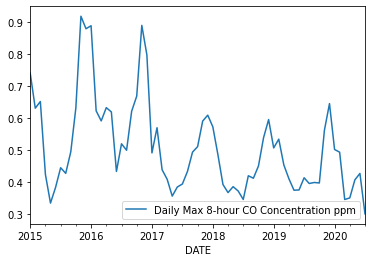

In [312]:
CO_monthly_df.plot()
#no obvious increasing or decreasing trend
#may be some seasonality
#lower peaks after 2017

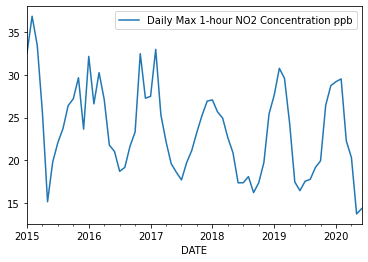

In [313]:
NO2_monthly_df.plot()
#no obvious increasing or decreasing trend
#lowest value for this timeframe occurs in 2020
#some seasonality

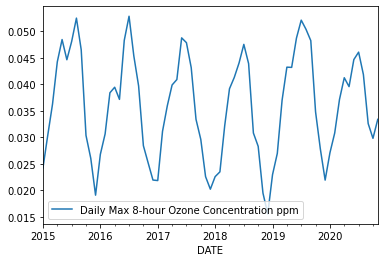

In [314]:
ozone_monthly_df.plot()
#no obvious increasing or decreasing trent
#seasonality
#2020 seems to deviate from normal trend of previous 5 years

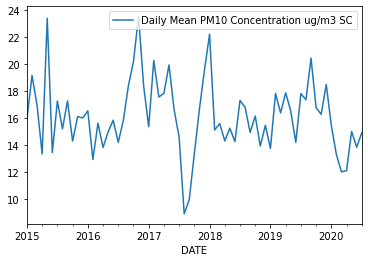

In [315]:
PM10_monthly_df.plot()
#no obvious trend
#no obvious seasonality
#outliar in mid 2017
#2020 values look slightly lower than previous 5 years (with the exception of the outliar)

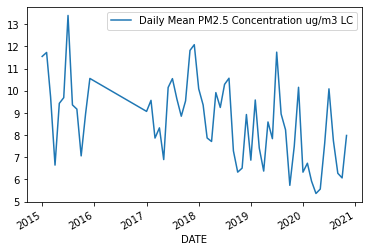

In [316]:
PM2_5_monthly_df.plot()
#deacreasing trend
#some data anomolies in 2016-2017 timeframe
#lowest value occurs in 2020

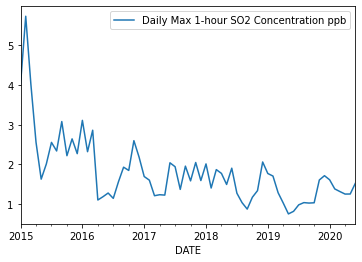

In [317]:
SO2_monthly_df.plot()
#outlier in early 2015
#potential data anomolies at the end of data

In [318]:
CO_monthly_df.describe()

,Daily Max 8-hour CO Concentration ppm
count,67.000000
mean,0.507999
std,0.145189
min,0.300000
25%,0.397554
50%,0.485714
75%,0.593086
max,0.918391


In [319]:
NO2_monthly_df.describe()

,Daily Max 1-hour NO2 Concentration ppb
count,66.000000
mean,23.583052
std,5.324437
min,13.749587
25%,19.295600
50%,23.319758
75%,27.187463
max,36.846429


In [320]:
ozone_monthly_df.describe()

,Daily Max 8-hour Ozone Concentration ppm
count,71.000000
mean,0.035923
std,0.009837
min,0.015585
25%,0.028067
50%,0.037011
75%,0.044128
max,0.052828


In [321]:
PM10_monthly_df.describe()

,Daily Mean PM10 Concentration ug/m3 SC
count,67.000000
mean,16.159875
std,2.712904
min,8.923077
25%,14.327957
50%,15.967742
75%,17.486652
max,23.571429


In [322]:
PM2_5_monthly_df.describe()

,Daily Mean PM2.5 Concentration ug/m3 LC
count,59.000000
mean,8.650625
std,1.853748
min,5.368000
25%,7.175624
50%,8.927407
75%,9.816055
max,13.392913


In [323]:
SO2_monthly_df.describe()

,Daily Max 1-hour SO2 Concentration ppb
count,66.000000
mean,1.803912
std,0.839687
min,0.753333
25%,1.253710
50%,1.610298
75%,2.046518
max,5.732000


CO, NO2, ozone, and PM10 data seem to be the most complete based on the graphs. 

I believe we should create models for CO, NO2, and PM10 since these pollutants are easy to understand in terms of their causes, contributions to air pollution, and effects on health.

CO:

From NASA (https://climate.nasa.gov/news/2291/fourteen-years-of-carbon-monoxide-from-mopitt/#:~:text=and%20carbon%20dioxide.-,Though%20carbon%20monoxide%20does%20not%20cause%20climate%20change%20directly%2C%20its,gas%20and%20wood%E2%80%94are%20burned.):

"Though carbon monoxide does not cause climate change directly, its presence affects the abundance of greenhouse gases such as methane and carbon dioxide."

PM10:

From EPA (https://www.epa.gov/sites/production/files/2014-05/documents/huff-particle.pdf):

-Exposure to particle pollution is a
public health hazard

-When inhaled, particle pollution can
travel deep into the lungs and cause or
aggravate heart and lung diseases

• Primary sources:

– Incomplete combustion

– Automobile emissions

– Dust

– Cooking

• Secondary sources:

– Chemical reactions in the atmosphere

NO2:

From EPA: https://www.epa.gov/no2-pollution/basic-information-about-no2#:~:text=Nitrogen%20Dioxide%20(NO2)%20is,from%20the%20burning%20of%20fuel.

NO2 primarily gets in the air from the burning of fuel. NO2 forms from emissions from cars, trucks and buses, power plants, and off-road equipment.

In [324]:
#read in gasoline sales data

gasoline_sales_df = pd.read_csv('District_of_Columbia_Total_Gasoline_All_Sales_per_Deliveries_by_Prime_Supplier.csv', skiprows=4)
gasoline_sales_df.head()

,Month,District of Columbia Total Gasoline All Sales/Deliveries by Prime Supplier Thousand Gallons per Day
0,Aug 2020,172.1
1,Jul 2020,166.3
2,Jun 2020,150.8
3,May 2020,117.9
4,Apr 2020,94.1


In [325]:
#rename column to shorter name
gasoline_sales_df = gasoline_sales_df.rename(columns={'District of Columbia Total Gasoline All Sales/Deliveries by Prime Supplier Thousand Gallons per Day':'Prime Supplier Sales of Gasoline Mgal/d'})

#change format of months in Month column to match our other data
gasoline_sales_df['DATE'] = pd.to_datetime(gasoline_sales_df['Month'], infer_datetime_format=True)

gasoline_sales_df.head()

,Month,Prime Supplier Sales of Gasoline Mgal/d,DATE
0,Aug 2020,172.1,2020-08-01
1,Jul 2020,166.3,2020-07-01
2,Jun 2020,150.8,2020-06-01
3,May 2020,117.9,2020-05-01
4,Apr 2020,94.1,2020-04-01


In [329]:
#merge dataframes together
pollution_df = gasoline_sales_df[['DATE', 'Prime Supplier Sales of Gasoline Mgal/d']].merge(CO_monthly_df, on='DATE')
pollution_df = pollution_df.merge(PM10_monthly_df, on='DATE')
pollution_df = pollution_df.merge(NO2_monthly_df, on='DATE')

In [330]:
#add seasonal dummy variables
#since we observed seasonality in NO2 and CO data, we will add these dummies to try to capture 
#the differing behavior in different months

pollution_df= pollution_df.set_index('DATE')
month_dummies = pd.get_dummies(pollution_df.index.month).rename(columns={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 
                                                                         6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 
                                                                         11:'Nov', 12:'Dec'})
month_dummies.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0


In [331]:
pollution_df = pollution_df.reset_index()
pollution_df = pd.concat([pollution_df, month_dummies], axis=1)
pollution_df.head()

,DATE,Prime Supplier Sales of Gasoline Mgal/d,Daily Max 8-hour CO Concentration ppm,Daily Mean PM10 Concentration ug/m3 SC,Daily Max 1-hour NO2 Concentration ppb,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2020-06-01,150.8,0.426667,13.866667,14.376724,0,0,0,0,0,1,0,0,0,0,0,0
1,2020-05-01,117.9,0.406452,15.038462,13.749587,0,0,0,0,1,0,0,0,0,0,0,0
2,2020-04-01,94.1,0.350000,12.133333,20.318803,0,0,0,1,0,0,0,0,0,0,0,0
3,2020-03-01,152.6,0.345161,12.032258,22.285484,0,0,1,0,0,0,0,0,0,0,0,0
4,2020-02-01,182.5,0.493103,13.321429,29.524138,0,1,0,0,0,0,0,0,0,0,0,0


We will split our dataframe into training and testing sets. 

The training set will be the larger of the two and will be used to train and evaluate the model.

Once we have a reasonable model, we will see how it preforms on the testing set by inputting real data for the years in the testing set and comparing the output of the model against the real pollution data.

We will then re-run the regression to get coefficients based on the entire dataset (through 2019). 

We are interested to see how our model will preform with 2020 actual data, since there were large anomolies due to COVID-19 mitigation efforts. 

In [332]:
#create training and testing dataframes
pollution_train_df = pollution_df.loc[pollution_df['DATE'] < '01/01/2019']
pollution_test_df = pollution_df.loc[pollution_df['DATE'] >= '01/01/2019']

In [333]:
#followed along with this: https://datatofish.com/statsmodels-linear-regression/
#trying to predict Ys with X
#trying to predict Y= CO and PM10 levels with X= gasoline sales
#use training dataframe
Y_CO = pollution_train_df['Daily Max 8-hour CO Concentration ppm'] 
Y_PM = pollution_train_df['Daily Mean PM10 Concentration ug/m3 SC']
Y_NO2 = pollution_train_df['Daily Max 1-hour NO2 Concentration ppb']
X = pollution_train_df['Prime Supplier Sales of Gasoline Mgal/d']

In [334]:
X = sm.add_constant(X)

In [335]:
model_CO = sm.OLS(Y_CO, X).fit()
predictions_CO = model_CO.predict(X)

model_PM = sm.OLS(Y_PM, X).fit()
predictions_PM = model_PM.predict(X)

model_NO2 = sm.OLS(Y_NO2, X).fit()
predictions_NO2 = model_NO2.predict(X)

In [336]:
print(model_CO.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.283
Model:                                               OLS   Adj. R-squared:                  0.267
Method:                                    Least Squares   F-statistic:                     18.14
Date:                                   Mon, 16 Nov 2020   Prob (F-statistic):           0.000100
Time:                                           18:34:50   Log-Likelihood:                 29.977
No. Observations:                                     48   AIC:                            -55.95
Df Residuals:                                         46   BIC:                            -52.21
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

In [337]:
print(model_PM.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Daily Mean PM10 Concentration ug/m3 SC   R-squared:                       0.010
Model:                                                OLS   Adj. R-squared:                 -0.012
Method:                                     Least Squares   F-statistic:                    0.4460
Date:                                    Mon, 16 Nov 2020   Prob (F-statistic):              0.508
Time:                                            18:34:51   Log-Likelihood:                -118.20
No. Observations:                                      48   AIC:                             240.4
Df Residuals:                                          46   BIC:                             244.1
Df Model:                                               1                                         
Covariance Type:                                nonrobust                                         
          

In [338]:
print(model_NO2.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Daily Max 1-hour NO2 Concentration ppb   R-squared:                       0.223
Model:                                                OLS   Adj. R-squared:                  0.206
Method:                                     Least Squares   F-statistic:                     13.18
Date:                                    Mon, 16 Nov 2020   Prob (F-statistic):           0.000709
Time:                                            18:34:51   Log-Likelihood:                -140.20
No. Observations:                                      48   AIC:                             284.4
Df Residuals:                                          46   BIC:                             288.1
Df Model:                                               1                                         
Covariance Type:                                nonrobust                                         
          

Interpreting results:

R^2:

CO model: 0.283
PM model: 0.01
NO2 model: .223

all extremely low

coefficient on gasoline sales:

CO model: there is a neg coeff on gasoline sales. this makes sense because we would expect that an increase in gasoline sales would cause an increase in CO levels.

PM model: pos coefficient. doesn't make intuitive sense

NO2 model: neg coeff makes sense

P-value:

A p-value of less than 0.05 is considered to be statistically significant.

CO model: 0 suggests gasoline sales are signifcant as a predictor of CO levels

PM model: 0.5 suggests gasoline sales are not signifcant as a predictor of PM10 levels

NO2 model: 0.001 suggests gasoline sales are sig as a predictor of NO2 levels

Since we noticed seasonality in all of these series (except PM10), maybe adding seasonal varibles into our regression will help fit.

In [339]:
X_seasonal = pollution_train_df[['Prime Supplier Sales of Gasoline Mgal/d', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                                 'Sep', 'Oct', 'Nov', 'Dec']]
X_seasonal = sm.add_constant(X_seasonal)

In [340]:
model_CO_seasonal = sm.OLS(Y_CO, X_seasonal).fit()
predictions_CO_seasonal = model_CO_seasonal.predict(X_seasonal)

model_NO2_seasonal = sm.OLS(Y_NO2, X_seasonal).fit()
predictions_NO2_seasonal = model_NO2_seasonal.predict(X_seasonal)

In [341]:
print(model_CO_seasonal.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.603
Model:                                               OLS   Adj. R-squared:                  0.467
Method:                                    Least Squares   F-statistic:                     4.427
Date:                                   Mon, 16 Nov 2020   Prob (F-statistic):           0.000275
Time:                                           18:35:58   Log-Likelihood:                 44.159
No. Observations:                                     48   AIC:                            -62.32
Df Residuals:                                         35   BIC:                            -37.99
Df Model:                                             12                                         
Covariance Type:                               nonrobust                                         
                    

In [342]:
print(model_NO2_seasonal.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Daily Max 1-hour NO2 Concentration ppb   R-squared:                       0.686
Model:                                                OLS   Adj. R-squared:                  0.579
Method:                                     Least Squares   F-statistic:                     6.379
Date:                                    Mon, 16 Nov 2020   Prob (F-statistic):           8.00e-06
Time:                                            18:35:59   Log-Likelihood:                -118.43
No. Observations:                                      48   AIC:                             262.9
Df Residuals:                                          35   BIC:                             287.2
Df Model:                                              12                                         
Covariance Type:                                nonrobust                                         
          

Adding the monthly dummies did help with the R^2 values for both pollutants.

CO seasonal model: R^2 = 0.603

NO2 seasonal model: R^2 = 0.686

Still not very high. There are month dummies in both models that seem insignificant according to their P-values. 

We will remove them based on which have the highest P-values first. For the CO seasonal model that is Feb and for the NO2 seasonal model that is Mar.

In [344]:
X_seasonal_CO2 = pollution_train_df[['Prime Supplier Sales of Gasoline Mgal/d', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                                     'Sep', 'Oct', 'Nov', 'Dec']]
X_seasonal_CO2 = sm.add_constant(X_seasonal_CO2)

X_seasonal_NO22 = pollution_train_df[['Prime Supplier Sales of Gasoline Mgal/d', 'Feb', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                                      'Sep', 'Oct', 'Nov', 'Dec']]
X_seasonal_NO22 = sm.add_constant(X_seasonal_NO22)

In [345]:
model_CO_seasonal2 = sm.OLS(Y_CO, X_seasonal_CO2).fit()
predictions_CO_seasonal2 = model_CO_seasonal2.predict(X_seasonal_CO2)

model_NO2_seasonal2 = sm.OLS(Y_NO2, X_seasonal_NO22).fit()
predictions_NO2_seasonal2 = model_NO2_seasonal2.predict(X_seasonal_NO22)

In [346]:
print(model_CO_seasonal2.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.598
Model:                                               OLS   Adj. R-squared:                  0.475
Method:                                    Least Squares   F-statistic:                     4.863
Date:                                   Mon, 16 Nov 2020   Prob (F-statistic):           0.000142
Time:                                           18:49:15   Log-Likelihood:                 43.856
No. Observations:                                     48   AIC:                            -63.71
Df Residuals:                                         36   BIC:                            -41.26
Df Model:                                             11                                         
Covariance Type:                               nonrobust                                         
                    

In [347]:
print(model_NO2_seasonal2.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Daily Max 1-hour NO2 Concentration ppb   R-squared:                       0.686
Model:                                                OLS   Adj. R-squared:                  0.590
Method:                                     Least Squares   F-statistic:                     7.149
Date:                                    Mon, 16 Nov 2020   Prob (F-statistic):           2.89e-06
Time:                                            18:49:53   Log-Likelihood:                -118.45
No. Observations:                                      48   AIC:                             260.9
Df Residuals:                                          36   BIC:                             283.4
Df Model:                                              11                                         
Covariance Type:                                nonrobust                                         
          

CO remove Oct, NO2 remove Feb

In [348]:
X_seasonal_CO3 = pollution_train_df[['Prime Supplier Sales of Gasoline Mgal/d', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                                     'Sep', 'Nov', 'Dec']]
X_seasonal_CO3 = sm.add_constant(X_seasonal_CO3)

X_seasonal_NO23 = pollution_train_df[['Prime Supplier Sales of Gasoline Mgal/d', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                                      'Sep', 'Oct', 'Nov', 'Dec']]
X_seasonal_NO23 = sm.add_constant(X_seasonal_NO23)

model_CO_seasonal3 = sm.OLS(Y_CO, X_seasonal_CO3).fit()
predictions_CO_seasonal3 = model_CO_seasonal3.predict(X_seasonal_CO3)

model_NO2_seasonal3 = sm.OLS(Y_NO2, X_seasonal_NO23).fit()
predictions_NO2_seasonal3 = model_NO2_seasonal3.predict(X_seasonal_NO23)

In [350]:
print(model_CO_seasonal3.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.593
Model:                                               OLS   Adj. R-squared:                  0.483
Method:                                    Least Squares   F-statistic:                     5.392
Date:                                   Mon, 16 Nov 2020   Prob (F-statistic):           6.89e-05
Time:                                           18:52:50   Log-Likelihood:                 43.576
No. Observations:                                     48   AIC:                            -65.15
Df Residuals:                                         37   BIC:                            -44.57
Df Model:                                             10                                         
Covariance Type:                               nonrobust                                         
                    

In [351]:
print(model_NO2_seasonal3.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Daily Max 1-hour NO2 Concentration ppb   R-squared:                       0.679
Model:                                                OLS   Adj. R-squared:                  0.592
Method:                                     Least Squares   F-statistic:                     7.834
Date:                                    Mon, 16 Nov 2020   Prob (F-statistic):           1.39e-06
Time:                                            18:53:02   Log-Likelihood:                -118.96
No. Observations:                                      48   AIC:                             259.9
Df Residuals:                                          37   BIC:                             280.5
Df Model:                                              10                                         
Covariance Type:                                nonrobust                                         
          

CO remove Mar

NO2 is getting close. Try removing Nov.

In [352]:
X_seasonal_CO4 = pollution_train_df[['Prime Supplier Sales of Gasoline Mgal/d', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                                     'Sep', 'Nov', 'Dec']]
X_seasonal_CO4 = sm.add_constant(X_seasonal_CO4)

X_seasonal_NO24 = pollution_train_df[['Prime Supplier Sales of Gasoline Mgal/d', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                                      'Sep', 'Oct', 'Dec']]
X_seasonal_NO24 = sm.add_constant(X_seasonal_NO24)

model_CO_seasonal4 = sm.OLS(Y_CO, X_seasonal_CO4).fit()
predictions_CO_seasonal4 = model_CO_seasonal4.predict(X_seasonal_CO4)

model_NO2_seasonal4 = sm.OLS(Y_NO2, X_seasonal_NO24).fit()
predictions_NO2_seasonal4 = model_NO2_seasonal4.predict(X_seasonal_NO24)

In [354]:
print(model_CO_seasonal4.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.586
Model:                                               OLS   Adj. R-squared:                  0.488
Method:                                    Least Squares   F-statistic:                     5.971
Date:                                   Mon, 16 Nov 2020   Prob (F-statistic):           3.53e-05
Time:                                           18:55:35   Log-Likelihood:                 43.151
No. Observations:                                     48   AIC:                            -66.30
Df Residuals:                                         38   BIC:                            -47.59
Df Model:                                              9                                         
Covariance Type:                               nonrobust                                         
                    

In [355]:
print(model_NO2_seasonal4.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Daily Max 1-hour NO2 Concentration ppb   R-squared:                       0.663
Model:                                                OLS   Adj. R-squared:                  0.583
Method:                                     Least Squares   F-statistic:                     8.311
Date:                                    Mon, 16 Nov 2020   Prob (F-statistic):           1.04e-06
Time:                                            18:55:48   Log-Likelihood:                -120.13
No. Observations:                                      48   AIC:                             260.3
Df Residuals:                                          38   BIC:                             279.0
Df Model:                                               9                                         
Covariance Type:                                nonrobust                                         
          

CO remove Jun. 

NO2 still close, remove Apr.

In [356]:
X_seasonal_CO5 = pollution_train_df[['Prime Supplier Sales of Gasoline Mgal/d', 'Apr', 'May', 'Jul', 'Aug',
                                     'Sep', 'Nov', 'Dec']]
X_seasonal_CO5 = sm.add_constant(X_seasonal_CO5)

X_seasonal_NO25 = pollution_train_df[['Prime Supplier Sales of Gasoline Mgal/d', 'May', 'Jun', 'Jul', 'Aug',
                                      'Sep', 'Oct', 'Dec']]
X_seasonal_NO25 = sm.add_constant(X_seasonal_NO25)

model_CO_seasonal5 = sm.OLS(Y_CO, X_seasonal_CO5).fit()
predictions_CO_seasonal5 = model_CO_seasonal5.predict(X_seasonal_CO5)

model_NO2_seasonal5 = sm.OLS(Y_NO2, X_seasonal_NO25).fit()
predictions_NO2_seasonal5 = model_NO2_seasonal5.predict(X_seasonal_NO25)

In [357]:
print(model_CO_seasonal5.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.579
Model:                                               OLS   Adj. R-squared:                  0.493
Method:                                    Least Squares   F-statistic:                     6.711
Date:                                   Mon, 16 Nov 2020   Prob (F-statistic):           1.67e-05
Time:                                           18:57:55   Log-Likelihood:                 42.776
No. Observations:                                     48   AIC:                            -67.55
Df Residuals:                                         39   BIC:                            -50.71
Df Model:                                              8                                         
Covariance Type:                               nonrobust                                         
                    

In [358]:
print(model_NO2_seasonal5.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Daily Max 1-hour NO2 Concentration ppb   R-squared:                       0.638
Model:                                                OLS   Adj. R-squared:                  0.564
Method:                                     Least Squares   F-statistic:                     8.586
Date:                                    Mon, 16 Nov 2020   Prob (F-statistic):           1.17e-06
Time:                                            18:58:10   Log-Likelihood:                -121.87
No. Observations:                                      48   AIC:                             261.7
Df Residuals:                                          39   BIC:                             278.6
Df Model:                                               8                                         
Covariance Type:                                nonrobust                                         
          

CO remove Sep, NO2 remove Dec.

In [359]:
X_seasonal_CO6 = pollution_train_df[['Prime Supplier Sales of Gasoline Mgal/d', 'Apr', 'May', 'Jul', 'Aug',
                                     'Nov', 'Dec']]
X_seasonal_CO6 = sm.add_constant(X_seasonal_CO6)

X_seasonal_NO26 = pollution_train_df[['Prime Supplier Sales of Gasoline Mgal/d', 'May', 'Jun', 'Jul', 'Aug',
                                      'Sep', 'Oct']]
X_seasonal_NO26 = sm.add_constant(X_seasonal_NO26)

model_CO_seasonal6 = sm.OLS(Y_CO, X_seasonal_CO6).fit()
predictions_CO_seasonal6 = model_CO_seasonal6.predict(X_seasonal_CO6)

model_NO2_seasonal6 = sm.OLS(Y_NO2, X_seasonal_NO26).fit()
predictions_NO2_seasonal6 = model_NO2_seasonal6.predict(X_seasonal_NO26)

In [360]:
print(model_CO_seasonal6.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.570
Model:                                               OLS   Adj. R-squared:                  0.495
Method:                                    Least Squares   F-statistic:                     7.568
Date:                                   Mon, 16 Nov 2020   Prob (F-statistic):           8.39e-06
Time:                                           19:00:48   Log-Likelihood:                 42.243
No. Observations:                                     48   AIC:                            -68.49
Df Residuals:                                         40   BIC:                            -53.52
Df Model:                                              7                                         
Covariance Type:                               nonrobust                                         
                    

In [361]:
print(model_NO2_seasonal6.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Daily Max 1-hour NO2 Concentration ppb   R-squared:                       0.617
Model:                                                OLS   Adj. R-squared:                  0.551
Method:                                     Least Squares   F-statistic:                     9.225
Date:                                    Mon, 16 Nov 2020   Prob (F-statistic):           9.62e-07
Time:                                            19:01:02   Log-Likelihood:                -123.18
No. Observations:                                      48   AIC:                             262.4
Df Residuals:                                          40   BIC:                             277.3
Df Model:                                               7                                         
Covariance Type:                                nonrobust                                         
          

model_NO2_seasonal6 looks good. Low R^2, but all predictors are significant based on P-values.

For CO model, remove Apr.

In [362]:
X_seasonal_CO7 = pollution_train_df[['Prime Supplier Sales of Gasoline Mgal/d', 'May', 'Jul', 'Aug', 'Nov', 'Dec']]
X_seasonal_CO7 = sm.add_constant(X_seasonal_CO7)

model_CO_seasonal7 = sm.OLS(Y_CO, X_seasonal_CO7).fit()
predictions_CO_seasonal7 = model_CO_seasonal7.predict(X_seasonal_CO7)

print(model_CO_seasonal7.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.562
Model:                                               OLS   Adj. R-squared:                  0.498
Method:                                    Least Squares   F-statistic:                     8.771
Date:                                   Mon, 16 Nov 2020   Prob (F-statistic):           3.66e-06
Time:                                           19:04:24   Log-Likelihood:                 41.816
No. Observations:                                     48   AIC:                            -69.63
Df Residuals:                                         41   BIC:                            -56.53
Df Model:                                              6                                         
Covariance Type:                               nonrobust                                         
                    

Remove May

In [363]:
X_seasonal_CO8 = pollution_train_df[['Prime Supplier Sales of Gasoline Mgal/d', 'Jul', 'Aug', 'Nov', 'Dec']]
X_seasonal_CO8 = sm.add_constant(X_seasonal_CO8)

model_CO_seasonal8 = sm.OLS(Y_CO, X_seasonal_CO8).fit()
predictions_CO_seasonal8 = model_CO_seasonal8.predict(X_seasonal_CO8)

print(model_CO_seasonal8.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.549
Model:                                               OLS   Adj. R-squared:                  0.495
Method:                                    Least Squares   F-statistic:                     10.23
Date:                                   Mon, 16 Nov 2020   Prob (F-statistic):           1.84e-06
Time:                                           19:05:24   Log-Likelihood:                 41.117
No. Observations:                                     48   AIC:                            -70.23
Df Residuals:                                         42   BIC:                            -59.01
Df Model:                                              5                                         
Covariance Type:                               nonrobust                                         
                    

Remove Aug

In [366]:
X_seasonal_CO9 = pollution_train_df[['Prime Supplier Sales of Gasoline Mgal/d', 'Jul', 'Nov', 'Dec']]
X_seasonal_CO9 = sm.add_constant(X_seasonal_CO9)

model_CO_seasonal9 = sm.OLS(Y_CO, X_seasonal_CO9).fit()
predictions_CO_seasonal9 = model_CO_seasonal9.predict(X_seasonal_CO9)

print(model_CO_seasonal9.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.524
Model:                                               OLS   Adj. R-squared:                  0.479
Method:                                    Least Squares   F-statistic:                     11.82
Date:                                   Mon, 16 Nov 2020   Prob (F-statistic):           1.45e-06
Time:                                           19:08:22   Log-Likelihood:                 39.801
No. Observations:                                     48   AIC:                            -69.60
Df Residuals:                                         43   BIC:                            -60.25
Df Model:                                              4                                         
Covariance Type:                               nonrobust                                         
                    

Remove July

In [367]:
X_seasonal_CO10 = pollution_train_df[['Prime Supplier Sales of Gasoline Mgal/d', 'Nov', 'Dec']]
X_seasonal_CO10 = sm.add_constant(X_seasonal_CO10)

model_CO_seasonal10 = sm.OLS(Y_CO, X_seasonal_CO10).fit()
predictions_CO_seasonal10 = model_CO_seasonal10.predict(X_seasonal_CO10)

print(model_CO_seasonal10.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Daily Max 8-hour CO Concentration ppm   R-squared:                       0.501
Model:                                               OLS   Adj. R-squared:                  0.467
Method:                                    Least Squares   F-statistic:                     14.72
Date:                                   Mon, 16 Nov 2020   Prob (F-statistic):           8.91e-07
Time:                                           19:08:51   Log-Likelihood:                 38.679
No. Observations:                                     48   AIC:                            -69.36
Df Residuals:                                         44   BIC:                            -61.87
Df Model:                                              3                                         
Covariance Type:                               nonrobust                                         
                    

Looking good. Low R^2, but all predictors are significant based on P-values.